In [1]:
# Imports
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
# Load your merged dataset into a Pandas DataFrame
# Replace 'merged_data.csv' with the actual file path or URL of your dataset
merged_data = pd.read_csv('./CleanData/Set3/MergedDataSet3.csv')
print(merged_data)

     UnixTimeStampInMsec             Datetime  Latitude  Longitude  Speed  \
0          1683151309000  2023-05-03 22:01:49   41.3650    2.17171   0.85   
1          1683151374000  2023-05-03 22:02:54   41.3650    2.17180   0.07   
2          1683151506000  2023-05-03 22:05:06   41.3649    2.17176   0.09   
3          1683151562000  2023-05-03 22:06:02   41.3649    2.17176   0.41   
4          1683151610000  2023-05-03 22:06:50   41.3650    2.17176   0.03   
..                   ...                  ...       ...        ...    ...   
882        1683237213000  2023-05-04 21:53:33   48.7559    6.09115  43.97   
883        1683237223000  2023-05-04 21:53:43   48.7569    6.09374  41.43   
884        1683237311000  2023-05-04 21:55:11   48.7604    6.11211  29.53   
885        1683237365000  2023-05-04 21:56:05   48.7618    6.12292  27.78   
886        1683237410000  2023-05-04 21:56:50   48.7632    6.13128  25.94   

     TrackAngle    AccelX    AccelY     AccelZ     GyroX     GyroY     Gyro

In [3]:
# Define the state transition matrix (A) and observation matrix (H) for Latitude and Longitude
A = np.eye(2)  # Identity matrix for position tracking
H = np.array([[1, 0], [0, 1]])  # Observation matrix for Latitude and Longitude

# Initialize the Kalman Filter
kf = KalmanFilter(
    initial_state_mean=merged_data[['Latitude', 'Longitude']].iloc[0],  # Initial position
    initial_state_covariance=np.eye(2),  # Initial covariance matrix
    transition_matrices=A,
    observation_matrices=H
)

# Apply the Kalman Filter to the dataset
filtered_state_means, _ = kf.filter(merged_data[['Latitude', 'Longitude']].values)

# Update the Latitude and Longitude columns in the DataFrame with the filtered values
merged_data['Latitude'] = filtered_state_means[:, 0]
merged_data['Longitude'] = filtered_state_means[:, 1]

merged_and_filtered_data = merged_data
print(merged_and_filtered_data)


     UnixTimeStampInMsec             Datetime   Latitude  Longitude  Speed  \
0          1683151309000  2023-05-03 22:01:49  41.365000   2.171710   0.85   
1          1683151374000  2023-05-03 22:02:54  41.365000   2.171764   0.07   
2          1683151506000  2023-05-03 22:05:06  41.364938   2.171762   0.09   
3          1683151562000  2023-05-03 22:06:02  41.364915   2.171761   0.41   
4          1683151610000  2023-05-03 22:06:50  41.364967   2.171760   0.03   
..                   ...                  ...        ...        ...    ...   
882        1683237213000  2023-05-04 21:53:33  48.753995   6.064867  43.97   
883        1683237223000  2023-05-04 21:53:43  48.755790   6.082711  41.43   
884        1683237311000  2023-05-04 21:55:11  48.758639   6.100881  29.53   
885        1683237365000  2023-05-04 21:56:05  48.760593   6.114502  27.78   
886        1683237410000  2023-05-04 21:56:50  48.762204   6.124871  25.94   

     TrackAngle    AccelX    AccelY     AccelZ     GyroX     Gy

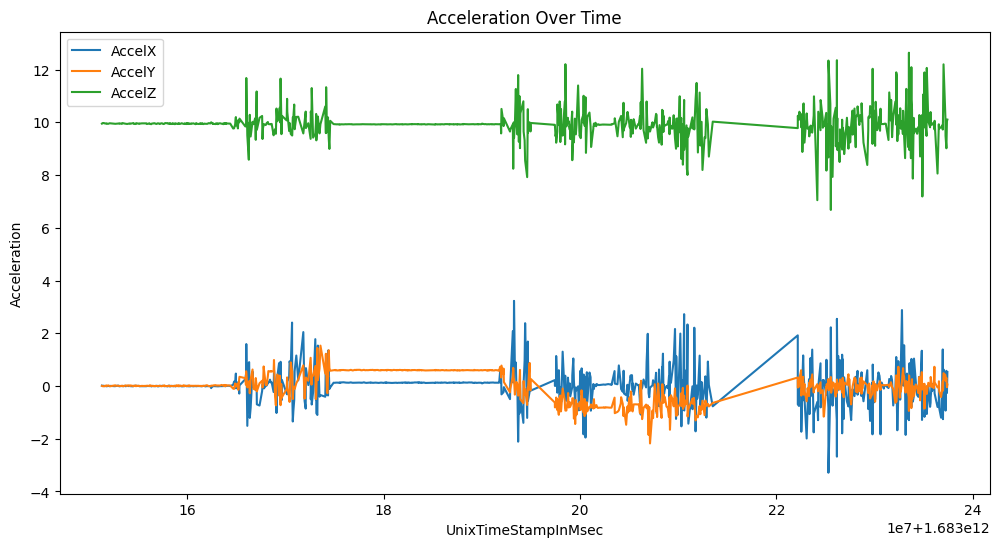

In [4]:

# Data Visualization
# Plot time series data of shock and GPS parameters
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelX'], label='AccelX')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelY'], label='AccelY')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['AccelZ'], label='AccelZ')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Acceleration')
plt.title('Acceleration Over Time')
plt.legend()
plt.show()


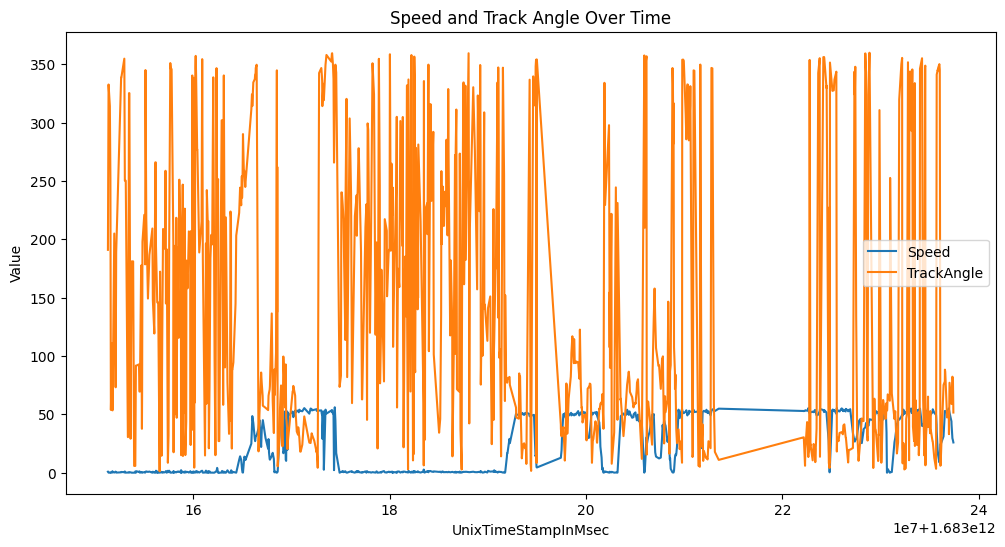

In [5]:
# Plot speed and track angle
plt.figure(figsize=(12, 6))
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['Speed'], label='Speed')
plt.plot(merged_and_filtered_data['UnixTimeStampInMsec'], merged_and_filtered_data['TrackAngle'], label='TrackAngle')
plt.xlabel('UnixTimeStampInMsec')
plt.ylabel('Value')
plt.title('Speed and Track Angle Over Time')
plt.legend()
plt.show()

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

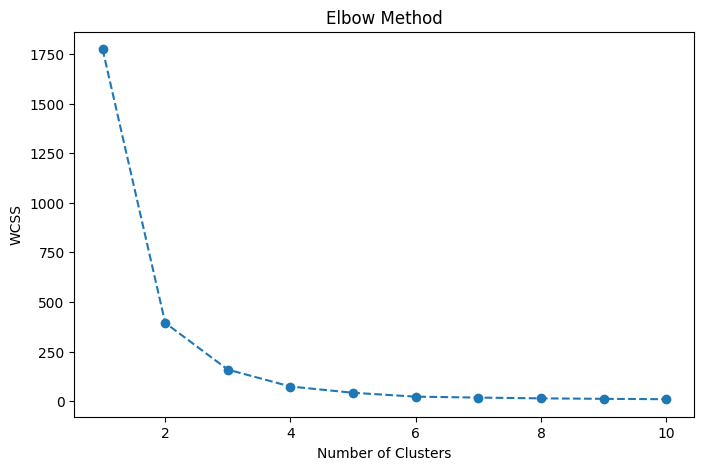

d:\MyWorkspace\ShockSensorAnalysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


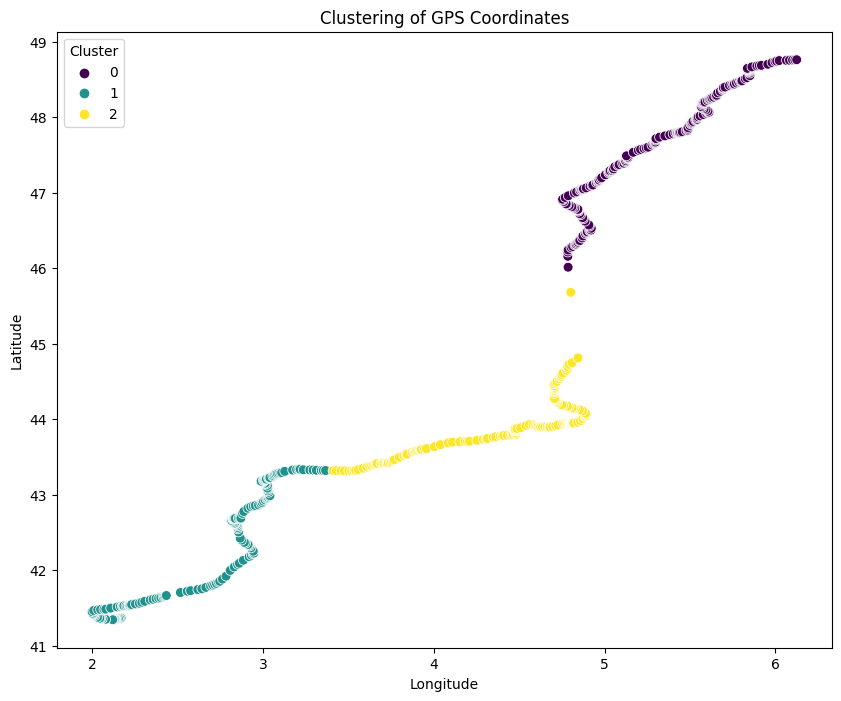

In [6]:
# Perform K-means clustering on data (Latitude and Longitude)
clustered_data = merged_and_filtered_data[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
merged_gps_data_scaled = scaler.fit_transform(clustered_data)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(merged_gps_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose an appropriate number of clusters and fit the K-means model
num_clusters = 3  # You can adjust this based on the Elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
merged_and_filtered_data['Cluster'] = kmeans.fit_predict(merged_gps_data_scaled)

# Visualize the clusters on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=merged_and_filtered_data, palette='viridis', s=50)
plt.title('Clustering of GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
